In [1]:
import sys
import csv
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import sexmachine.detector as gender
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from  sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold, train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

F:\Anaconda3\envs\pysparkEnv\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\Anaconda3\envs\pysparkEnv\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
F:\Anaconda3\envs\pysparkEnv\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  Deprecati

In [2]:
real_users = pd.read_csv("C:\\Users\\Rakesh Chauhan\\Documents\\2nd Sem\\rusers.csv")
fake_users = pd.read_csv("C:\\Users\\Rakesh Chauhan\\Documents\\2nd Sem\\fusers.csv")

In [4]:
real_users.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,1.481000e+03,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,397.0,4.0,719.0,1423.0,486.0,1063.000000,0.0,0.0
mean,4.000432e+08,3140.782579,690.922350,403.128292,439.611749,5.360567,1.0,1.0,1.0,1.0,1.0,1535.841957,NaN,NaN
std,2.961304e+08,6391.957957,11058.508986,610.572368,1970.556008,32.183232,0.0,0.0,0.0,0.0,0.0,7805.690161,NaN,NaN
min,3.610511e+06,3.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,1.572905e+08,315.000000,45.000000,115.000000,4.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
50%,3.822478e+08,992.000000,102.000000,226.000000,29.000000,1.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
75%,5.229255e+08,3029.000000,259.000000,437.000000,176.000000,2.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
max,1.219743e+09,79876.000000,408372.000000,12773.000000,44349.000000,744.000000,1.0,1.0,1.0,1.0,1.0,36000.000000,NaN,NaN


In [3]:
fake_users.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,1.337000e+03,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,0.0,1331.0,4.0,2.0,1337.0,3.0,6.000000,0.0,0.0
mean,6.897381e+08,45.442034,16.842184,386.761406,7.383695,0.002992,NaN,1.0,1.0,1.0,1.0,1.0,-8700.000000,NaN,NaN
std,2.135086e+08,97.765536,8.011299,210.139672,89.155940,0.054636,NaN,0.0,0.0,0.0,0.0,0.0,31247.847926,NaN,NaN
min,3.738459e+07,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,6.163001e+08,26.000000,13.000000,278.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-36000.000000,NaN,NaN
50%,6.170879e+08,36.000000,18.000000,344.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-8100.000000,NaN,NaN
75%,6.192317e+08,53.000000,22.000000,538.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,19800.000000,NaN,NaN
max,1.391998e+09,1576.000000,73.000000,1998.000000,1402.000000,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,19800.000000,NaN,NaN


In [5]:
def read_datasets():
    x = pd.concat([real_users,fake_users])
    y = len(fake_users)*[0] + len(real_users)*[1]
    return x,y

In [6]:
def predict_sex(name):
    sex_predictor = gender.Detector(unknown_value=u"unknown", case_sensitive=False)
    first_name = name.str.split(' ').str.get(0)
    sex = first_name.apply(sex_predictor.get_gender)
    sex_dict={'female': -2, 'mostly_female': -1, 'unknown':0, 'mostly_male':1, 'male':2}
    sex_code = sex.map(sex_dict).astype(int)
    return sex_code

In [7]:
x,y = read_datasets()
x.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,2.818000e+03,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,1728.0,8.0,721.0,2760.0,489.0,1069.000000,0.0,0.0
mean,5.374889e+08,1672.198368,371.105039,395.363023,234.541164,2.818666,1.0,1.0,1.0,1.0,1.0,1478.391020,NaN,NaN
std,2.977005e+08,4884.669157,8022.631339,465.694322,1445.847248,23.480430,0.0,0.0,0.0,0.0,0.0,8108.211889,NaN,NaN
min,3.610511e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,3.620867e+08,35.000000,17.000000,168.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
50%,6.162253e+08,77.000000,26.000000,306.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
75%,6.177673e+08,1087.750000,111.000000,519.000000,37.000000,1.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
max,1.391998e+09,79876.000000,408372.000000,12773.000000,44349.000000,744.000000,1.0,1.0,1.0,1.0,1.0,36000.000000,NaN,NaN


In [8]:
x.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13


In [9]:
print(real_users.columns)

Index([u'id', u'name', u'screen_name', u'statuses_count', u'followers_count',
       u'friends_count', u'favourites_count', u'listed_count', u'created_at',
       u'url', u'lang', u'time_zone', u'location', u'default_profile',
       u'default_profile_image', u'geo_enabled', u'profile_image_url',
       u'profile_banner_url', u'profile_use_background_image',
       u'profile_background_image_url_https', u'profile_text_color',
       u'profile_image_url_https', u'profile_sidebar_border_color',
       u'profile_background_tile', u'profile_sidebar_fill_color',
       u'profile_background_image_url', u'profile_background_color',
       u'profile_link_color', u'utc_offset', u'protected', u'verified',
       u'description', u'updated', u'dataset'],
      dtype='object')


In [10]:
def extract_features(x):
    lang_list = list(enumerate(np.unique(x['lang'])))
    lang_dict = {name : i for i, name in lang_list}
    x.loc[:,'lang_code'] = x['lang'].map( lambda x: lang_dict[x]).astype(int)    
    x.loc[:,'sex_code']=predict_sex(x['name'])
    feature_columns_to_use = ['statuses_count','followers_count',\
                              'friends_count','favourites_count',\
                              'listed_count','sex_code','lang_code']
    x=x.loc[:,feature_columns_to_use]
    return x

In [11]:
x = extract_features(x)

In [12]:
print x.columns
print x.describe()

Index([u'statuses_count', u'followers_count', u'friends_count',
       u'favourites_count', u'listed_count', u'sex_code', u'lang_code'],
      dtype='object')
       statuses_count  followers_count  friends_count  favourites_count  \
count     2818.000000      2818.000000    2818.000000       2818.000000   
mean      1672.198368       371.105039     395.363023        234.541164   
std       4884.669157      8022.631339     465.694322       1445.847248   
min          0.000000         0.000000       0.000000          0.000000   
25%         35.000000        17.000000     168.000000          0.000000   
50%         77.000000        26.000000     306.000000          0.000000   
75%       1087.750000       111.000000     519.000000         37.000000   
max      79876.000000    408372.000000   12773.000000      44349.000000   

       listed_count     sex_code    lang_code  
count   2818.000000  2818.000000  2818.000000  
mean       2.818666    -0.180270     2.851313  
std       23.480430  

In [13]:
print "spliting datasets in train and test dataset...\n"
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)

spliting datasets in train and test dataset...



In [14]:
clf = RandomForestClassifier(n_estimators=40, oob_score=True)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [15]:
scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=5)
print scores
print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std()/2))

[ 0.93791574  0.93569845  0.94678492  0.9556541   0.94222222]
Estimated score: 0.94366 (+/- 0.00355)


In [16]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

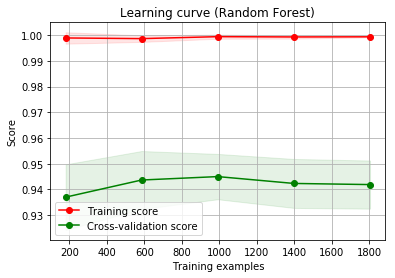

In [17]:
title = 'Learning curve (Random Forest)'
plot_learning_curve(clf, title, X_train, y_train, cv=5)
plt.show()

In [18]:
 # Predict 
y_pred = clf.predict(X_test)

In [19]:
print 'Classification Accuracy on Test dataset: ' ,accuracy_score(y_test, y_pred)

Classification Accuracy on Test dataset:  0.948581560284


In [20]:
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)

Confusion matrix, without normalization
[[267   1]
 [ 28 268]]


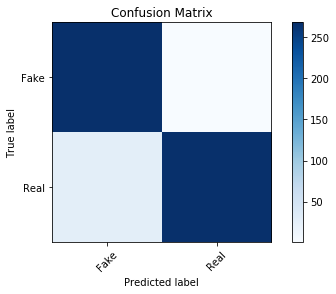

In [27]:
title = 'Confusion Matrix'
target_names=['Fake', 'Real']
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.99626866  0.00373134]
 [ 0.09459459  0.90540541]]


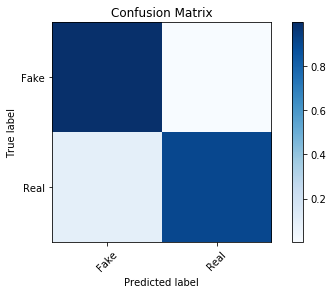

In [28]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
title = 'Confusion Matrix'
target_names=['Fake', 'Real']
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [29]:
print(classification_report(y_test, y_pred, target_names=['Fake','Real']))

             precision    recall  f1-score   support

       Fake       0.91      1.00      0.95       268
       Real       1.00      0.91      0.95       296

avg / total       0.95      0.95      0.95       564



False Positive Rate:  [ 0.          0.00373134  1.        ]
True Positive Rate:  [ 0.          0.90540541  1.        ]


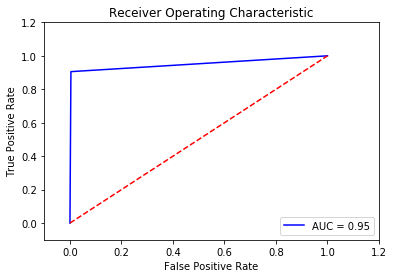

In [30]:
false_pos_rate, true_pos_rate, thresh = roc_curve(y_test, y_pred)

print "False Positive Rate: ",false_pos_rate
print "True Positive Rate: ", true_pos_rate

roc_auc = auc(false_pos_rate, true_pos_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_pos_rate,true_pos_rate,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()